In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

pima = pd.read_csv("../input/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Dimensions of the dataset

pima.shape

(768, 9)

In [4]:
# Review the distribution of the numerical features

pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Looking at class labels count 

pima.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAC1C8FA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EAC2457B70>]], dtype=object)

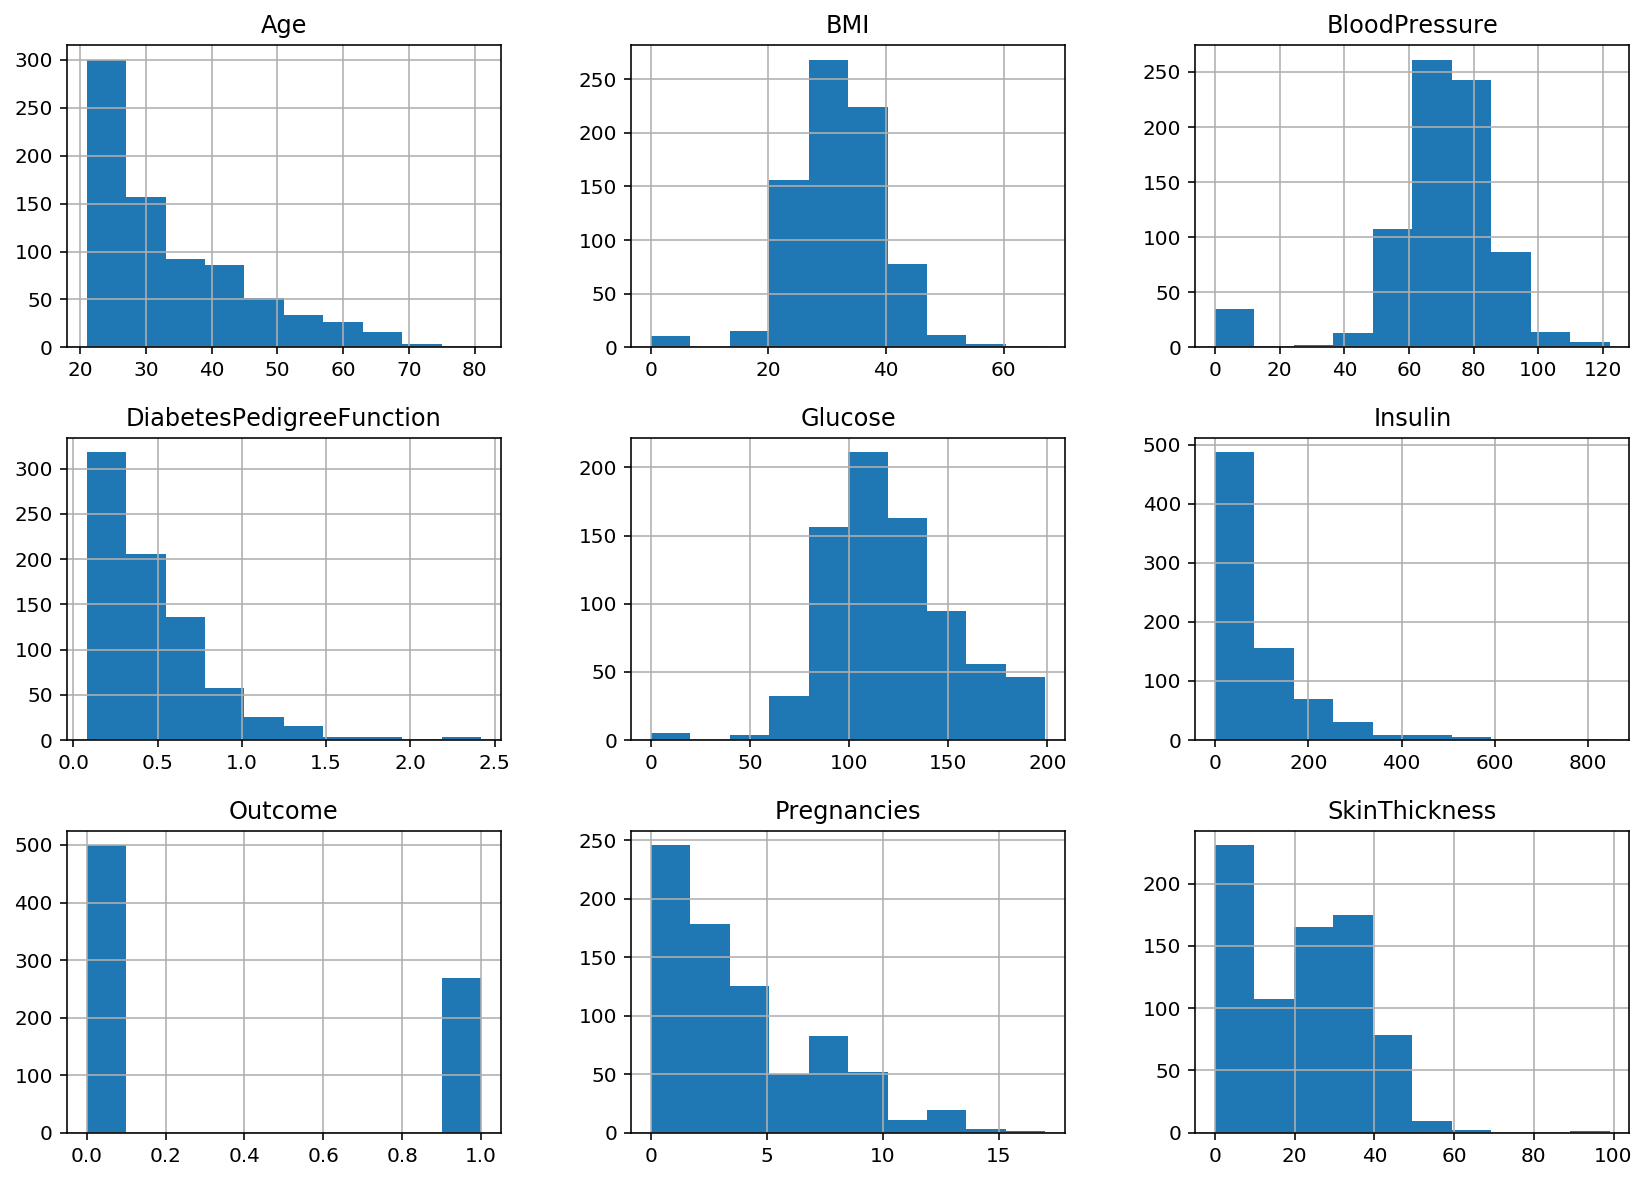

In [6]:
# Data visualization using histograms

pima.hist(figsize=(14,10))

In [7]:
# Separating the Class Labels from Independent Variables

column_x = pima.columns[0:len(pima.columns) - 1]
column_x

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

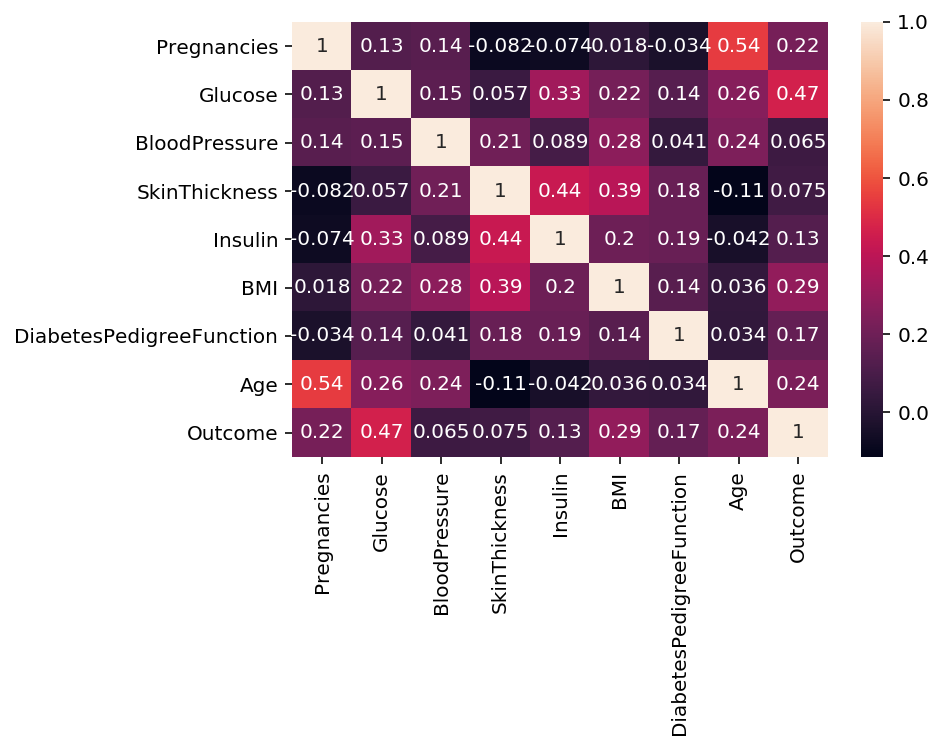

In [8]:
# To further help visualise any realtionships between the variables, a correlation heatmap was plotted

corr = pima[pima.columns].corr()
sns.heatmap(corr, annot = True)

In [9]:
# Feature extraction using Chi-squared distribution and SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

fit = select_top_4.fit(X,Y)
features = fit.transform(X)

features[0:5]

array([[ 148. ,    0. ,   33.6,   50. ],
       [  85. ,    0. ,   26.6,   31. ],
       [ 183. ,    0. ,   23.3,   32. ],
       [  89. ,   94. ,   28.1,   21. ],
       [ 137. ,  168. ,   43.1,   33. ]])

In [10]:
# Threfore, the top performing features are Glucose, Insulin, BMI, Age

In [11]:
# Creating new datadframe for the top performing features

X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [12]:
Y = pima.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
# Standardization
# It changes the attribute values to Guassian distribution with mean as 0 and standard deviation as 1. 
# It is useful when the algorithm expects the input features to be in Guassian distribution.

from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


In [14]:
# Binary Classification

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.776890534109
NB 0.760497091486
KNN 0.745928080381
DT 0.703622421999
SVM 0.776890534109


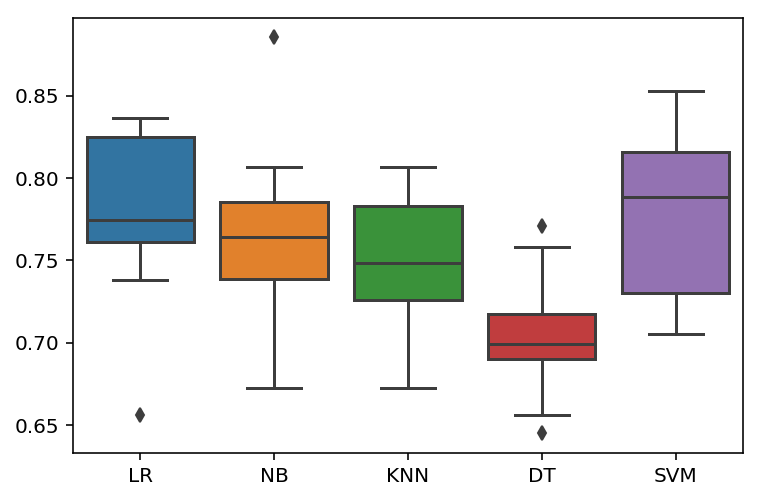

In [15]:
# Visualising Results

ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [16]:
# Final Prediction on Test Data using Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(Y_test,predictions))

0.714285714286


In [17]:
# Final Prediction on Test Data using SVM

svm = SVC()
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)

print(accuracy_score(Y_test,predictions))

0.733766233766


In [18]:
# Classification report on the test predictions

print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.72      0.39      0.51        54

avg / total       0.73      0.73      0.71       154



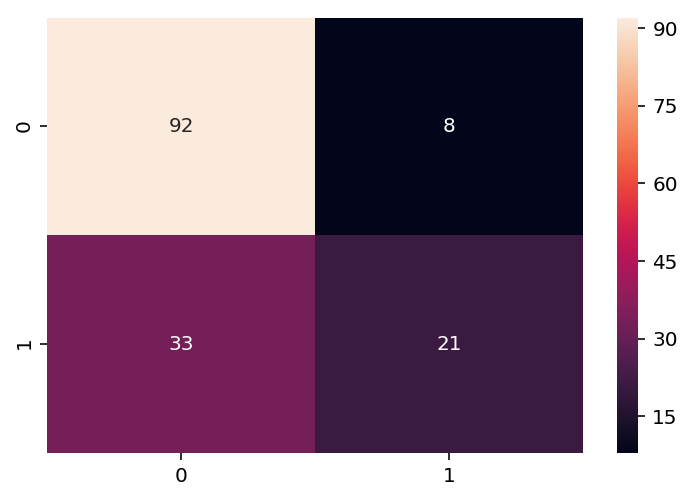

In [19]:
# Confusion matrix on the test predictions

conf = confusion_matrix(Y_test,predictions)

label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)